In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS
import bamboolib as bam
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from scipy.fftpack import fft, ifft
from scipy import signal
import os
import datetime
import time
from numpy import sign
from sklearn.cluster import KMeans
from scipy import pi
import plotly.express as px




In [2]:
up_or_down = 'up' # or down
all_data = pd.read_csv('./train_{}_Y.csv'.format(up_or_down))
all_data.drop(index=[71,91,48,53,72],axis=0,inplace=True)
all_data

,Nr.,spindle_speed,ap,fz,Ra_up,vbs,clamp_t1,clamp_t2,clamp_t3,clamp_t4,...,robot_f3,robot_f4,robot_f5,robot_f6,robot_f7,robot_f8,robot_f9,robot_f10,robot_f11,robot_f12
0,1,8000,0.2,0.050,12.90500,800,26.229323,35.996803,44.484558,0.123780,...,27.195928,38.454851,0.707217,41.489773,1.834573,2.750153,0.215668,5.045701,51.978762,5.050505
1,2,8000,0.2,0.065,6.78175,1040,29.329545,31.538638,43.024878,0.380916,...,28.010454,39.087481,0.716609,48.062763,2.059287,2.442525,0.162410,6.069366,45.485476,4.545455
2,3,8000,0.2,0.075,8.43450,1200,22.787313,38.788434,44.924273,0.123561,...,27.192374,38.362475,0.708827,48.174787,2.140555,2.318279,0.158031,6.145418,63.985078,5.050505
3,4,8000,0.2,0.100,6.77025,1600,28.397163,46.030452,54.015627,-0.147312,...,27.991056,39.301907,0.712206,54.038531,2.316717,2.182508,0.132116,7.249209,84.466924,5.050505
4,5,8000,0.4,0.050,12.54250,800,43.666667,28.707179,52.226146,0.457839,...,28.030627,38.133353,0.735069,33.375292,1.394820,3.848968,0.316728,4.060900,32.618295,6.060606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,16000,1.0,0.100,3.31500,3200,9.865741,416.723605,415.874887,-0.130696,...,30.735095,39.795877,0.772319,71.468094,2.671611,2.110433,0.077104,12.560238,84.996157,40.909091
100,101,16000,0.2,0.060,4.74450,1920,25.111913,118.858056,121.271781,-0.001316,...,32.362711,40.456815,0.799932,45.210775,1.563791,4.076264,0.182862,7.250659,72.977529,40.909091
101,102,16000,0.2,0.070,3.29000,2240,30.383459,116.131722,119.829170,-0.013588,...,31.749323,39.631053,0.801122,47.510061,1.674750,3.800691,0.161755,8.041105,78.270841,40.909091
102,103,16000,0.2,0.080,3.54700,2560,31.652510,161.716911,164.478772,-0.081270,...,30.550585,39.803982,0.767526,51.986447,1.963578,2.829154,0.139636,7.639984,63.748657,40.909091


In [3]:
all_data.columns

Index(['Nr.', 'spindle_speed', 'ap', 'fz', 'Ra_up', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5',
       'robot_t6', 'robot_t7', 'robot_t8', 'clamp_f1', 'clamp_f2', 'clamp_f3',
       'clamp_f4', 'clamp_f5', 'clamp_f6', 'clamp_f7', 'clamp_f8', 'clamp_f9',
       'clamp_f10', 'clamp_f11', 'clamp_f12', 'robot_f1', 'robot_f2',
       'robot_f3', 'robot_f4', 'robot_f5', 'robot_f6', 'robot_f7', 'robot_f8',
       'robot_f9', 'robot_f10', 'robot_f11', 'robot_f12'],
      dtype='object')

In [4]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5',
       'robot_t6', 'robot_t7', 'robot_t8'] 

In [5]:
# used_feature = 


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

X = all_data[used_feature] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = all_data['Ra_{}'.format(up_or_down)]



from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test= train_test_split(X, Y,test_size = 0.2, random_state = 20, shuffle = True)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

y_fit = regr.predict(x_train)



# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared = True))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Coefficients: 
 [-7.71036218e-04  4.52398093e-01 -1.08368389e+02  1.27125249e-03
 -4.34706116e-03 -2.15247507e-02  2.24909623e-02 -7.54731964e-01
 -1.94313692e-01  5.05418610e+00  1.71945139e+01 -4.57179180e+00
  4.95810727e+00 -5.81767259e-02 -4.86297912e+00  4.49176383e-01
  5.77879790e-02  1.27119549e+02  5.62417457e+03 -1.35262846e+02]
 Mean squared error: 1.83
Coefficient of determination: 0.78
MAE:1.00
mean absolute percentage error:0.17


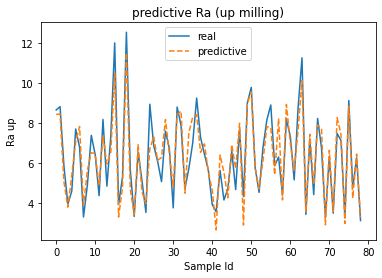

In [7]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

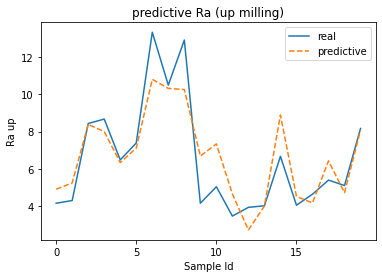

In [8]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()